## Logistic Regression
- This type of regression is used for classification.
- Logistic Regression gives the probability of an instance belonging to a certain class
- If instance belongs to certain class then, Probability belonging to the class = 1 (positive)
- Else, probability = 0 (negative)

#### Vectorized form of logistic regression probability formula: $$\hat{p} = h_\theta(\mathbf{x}) = \sigma(\mathbf{x}^T \theta)$$
$\sigma$ is sigma function that outputs value between 0 and 1 as $\sigma(t) = \cfrac{1}{1 + e ^ {-t}}$

- so, classification can be done as:
$$\hat{y} = \begin{cases} 0 &\text{ if } \hat{p} < 0.5 \\ 1 &\text{ if } \hat{p} \ge 0.5 \end{cases}$$

### Training and Cost Function
- Objective of training is to optimize the parameter $\theta$ so that model has higher probabilites for positive instances $(y=1)$ and lower probabilites for negative instances $y=0$
- Cost function of a single training instance: $c(\theta) = \begin{cases} -\log(\hat p) &\text{ if } y=1\\ -\log(1- \hat p) &\text{ if } y=0\end{cases}$
- Cost function over whole training is average of cost over all. The cost function of logistic regression is **Log Loss** function
- The cost function / Log loss function is 
$$J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[y^{(i)} * \log\left(\hat p^{(i)}\right) + \left(1-y^{(i)}\right) * \log\left(1 - \hat p^{(i)}\right)\right] $$

- There is no closed form solution avaibale to estimate the parameter theta, but good news is that, the cost function is convex surface, so gradient descent always ends up into the global minima

- Logistic Cost Function gradient:
$$\cfrac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m \left(\sigma\left(\theta^T x^{(i)}\right) - y^{(i)} \right) x_{j}^{(i)}$$

### Implementation of Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
from sklearn import datasets
iris = datasets.load_iris()

Taking a look at the data set

In [17]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
iris['data'][:7]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3]])

In [29]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
iris["data"][:, 3]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

lets train a logistic regression model based on sepal length 

In [75]:
X = iris["data"][:, 0] #taking speal length as feature

In [76]:
y = (iris["target"] == 0).astype(int) #predicting whether the flower is setosa or not based on sepal length only

In [77]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
X.mean(), X.std(), X.min(), X.max()

(5.843333333333334, 0.8253012917851409, 4.3, 7.9)

In [79]:
from sklearn.linear_model import LogisticRegression


In [80]:
lr = LogisticRegression() #by default they are using ridge regression with penalty='l2'

In [85]:
lr.fit(X.reshape(-1,1), y)

LogisticRegression()

In [100]:
X_new = np.linspace(4,8, 1000).reshape(-1, 1)

In [101]:
y_prob = lr.predict_proba(X_new)
y_pred = lr.predict(X_new)

In [102]:
y_pred[:10], y_prob[:10]

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([[0.00888328, 0.99111672],
        [0.00900601, 0.99099399],
        [0.00913041, 0.99086959],
        [0.00925652, 0.99074348],
        [0.00938436, 0.99061564],
        [0.00951394, 0.99048606],
        [0.0096453 , 0.9903547 ],
        [0.00977845, 0.99022155],
        [0.00991342, 0.99008658],
        [0.01005023, 0.98994977]]))

## Decision Boundaries

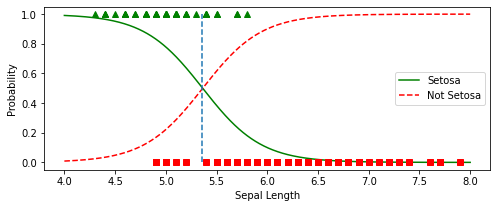

In [130]:
fig, ax = plt.subplots(figsize=(8,3))
decision_boundary = X_new[y_prob[:, 1]>.5][-1]
ax.plot(X_new, y_prob[:, 1], 'g-', label="Setosa")
ax.plot(X_new, y_prob[:, 0], 'r--', label="Not Setosa")
ax.plot(X[y==0], y[y==0],  'rs')
ax.plot(X[y==1], y[y==1], 'g^')
ax.vlines(decision_boundary, 0, 1, ls='--')
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Probability")
plt.legend()

In [113]:
#it has formed a decision boundary at around 5.4

In [118]:
lr.predict([[5.1], [5.2], [5.3], [5.4], [5.5], [5.6]])

array([1, 1, 1, 0, 0, 0])

#### Lets try out with two features, petal width and petal length to predict if the flower is Virginica (2) or not

In [135]:
X = iris["data"][:, 2:]
y = (iris["target"] == 2).astype(int)

In [143]:
log_reg = LogisticRegression(C=10**10)

In [144]:
log_reg.fit(X,y)

LogisticRegression(C=10000000000)

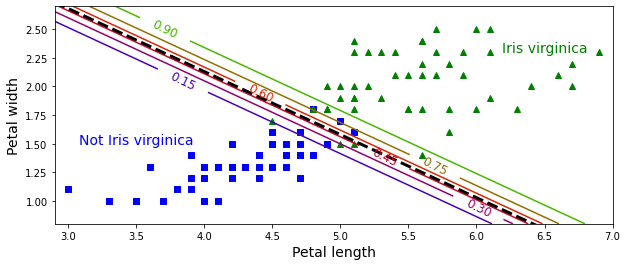

In [153]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [150]:
left_right

array([2.9, 7. ])

In [151]:
boundary

array([2.7361817 , 0.47773807])

## Softmax Regression
- In order to train and predict on multilabel / multiclass predictions, we can generalize logistic regression to do so. Unlike training on each class using binary classification. This is called *Softmax Regression* or *Multinomial Logistic Regression*.